Notebook to plot the LrLx plane for all the sources together. This is used to generate Figures 4-6 in the paper. 

In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Bahramian Sample

In [2]:
# Get Bahramian data
# This is just the detections
lr_all, lx_all, source_classes = get_bahramian_data()
print(len(lr_all))
print(len(lx_all))

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.
402
402


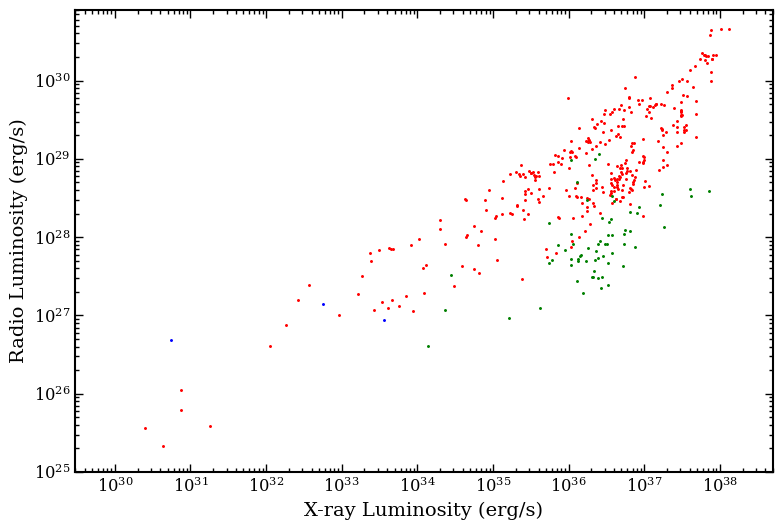

In [3]:
fig= plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
colours = ["red", "blue", "green", "purple"]
for i, cls in enumerate(["BH", "candidateBH", "NS", "candidateNS"]):
    mask_bah = (source_classes == cls) 
    plt.scatter(lx_all[mask_bah], lr_all[mask_bah], color=colours[i], s=5, marker=".")
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
plt.xlabel("X-ray Luminosity (erg/s)", fontsize=14)
plt.ylabel("Radio Luminosity (erg/s)", fontsize=14)
plt.xlim([3e29,5e38])
plt.ylim([1e25,8e30])
plt.show()

In [4]:
# Bahramian

print(f"Radio luminosity (Lr) range: {np.min(lr_all)} - {np.max(lr_all)} erg/s")
print(f"X-ray luminosity (Lx) range: {np.min(lx_all)} - {np.max(lx_all)} erg/s")

Radio luminosity (Lr) range: 2.1248e+25 - 4.5823999999999996e+30 erg/s
X-ray luminosity (Lx) range: 2.5e+30 - 1.32e+38 erg/s


# Pairing

In [5]:
all_data_paired = get_all_LrLx_data(names = None, interp=False, rerun = True, save=True)

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']


In [6]:
## Luminosity range

df = all_data_paired

Lx = df["Lx"].to_numpy()
Lr= df["Lr"].to_numpy()

print(f"Radio luminosity (Lr) range: {np.min(Lr)} - {np.max(Lr)} erg/s")
print(f"X-ray luminosity (Lx) range: {np.min(Lx)} - {np.max(Lx)} erg/s")


## Number of sources 
unique_names = df["name"].unique()
n_names = len(unique_names)
print("Sources: ", unique_names)
print("Number of sources: ", n_names)


## Number of BH and BH candidates
mask = df["class"].isin(["BH", "candidateBH"])
unique_names = df[mask]["name"].unique()
n_names = len(unique_names)
#print("BH and BH candidates: ", unique_names)
print("Number of BH and BH candidates: ", n_names)


## Number of sources actually used on the HS/QS plane
filtered_df = df[df["state"].isin(["HS", "QS"])]
unique_names = filtered_df["name"].unique()
n_names = len(unique_names)
#print("Sources: ", unique_names)
print("Number of sources used for the HS/QS plane: ", n_names)


## Number of BH and BH candidates used on the HS/QS plane
mask = filtered_df["class"].isin(["BH", "candidateBH"])
unique_names = filtered_df[mask]["name"].unique()
n_names = len(unique_names)
print("Number of BH and BH candidates used for the HS/QS plane: ", n_names)


print()

## Number of paired data points
n_data = len(df)
print(f"Number of paired LrLx data points: {n_data}")

## Number of paired HS/QS data points
n_data = len(df[df["state"].isin(["HS", "QS"])])
print(f"Number of paired HS & QS LrLx data points: {n_data}")


## Number of paired HS/QS data points for BH and BH candidates
mask = df["class"].isin(["BH", "candidateBH"]) & df["state"].isin(["HS", "QS"])
n_data = len(df[mask])
print(f"Number of paired HS & QS LrLx data points for BH/candidate BH: {n_data}")


Radio luminosity (Lr) range: 6.9101042666172875e+25 - 9.436096840227369e+30 erg/s
X-ray luminosity (Lx) range: 1.1584493888671988e+32 - 8.657182945483147e+38 erg/s
Sources:  ['1A 1744-361' '4U 1543-47' '4U 1630-47' 'Cen X-4' 'EXO 1846-031'
 'GRS 1739-278' 'GX 339-4' 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630'
 'MAXI J1631-479' 'MAXI J1803-298' 'MAXI J1807+132' 'MAXI J1810-222'
 'MAXI J1816-195' 'MAXI J1820+070' 'SAX J1808.4-3658' 'SAX J1810.8-2609'
 'Swift J1727.8-1613' 'Swift J1842.5-1124' 'Vela X-1' 'XTE J1701-462']
Number of sources:  22
Number of BH and BH candidates:  14
Number of sources used for the HS/QS plane:  18
Number of BH and BH candidates used for the HS/QS plane:  12

Number of paired LrLx data points: 285
Number of paired HS & QS LrLx data points: 180
Number of paired HS & QS LrLx data points for BH/candidate BH: 160


In [7]:
df.head()[["Fr", "Fr_unc", "t_diff", "Fr_uplim_bool"]]

,Fr,Fr_unc,t_diff,Fr_uplim_bool
0,1.240,0.064846,0.76522,False
1,0.087,0.018518,0.20989,False
2,0.081,0.027000,0.13873,True
3,0.093,0.031000,0.71769,True
4,0.051,0.017000,0.54753,True


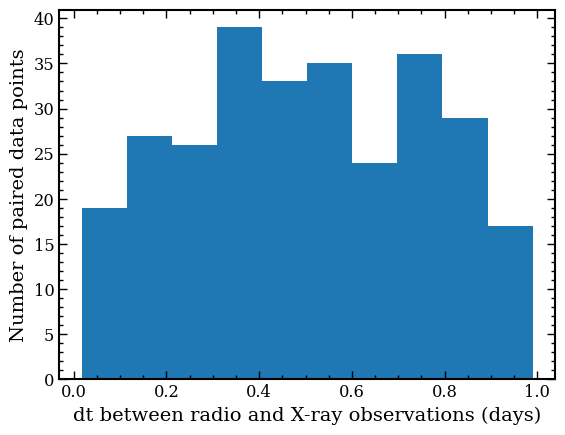

Mean dt: 0.5049052975572985 days


In [8]:
t_diff = df["t_diff"].to_numpy()
plt.hist(t_diff)
plt.xlabel("dt between radio and X-ray observations (days)", fontsize=14)
plt.ylabel("Number of paired data points", fontsize=14)
plt.show()
print(f"Mean dt: {np.mean(t_diff)} days")

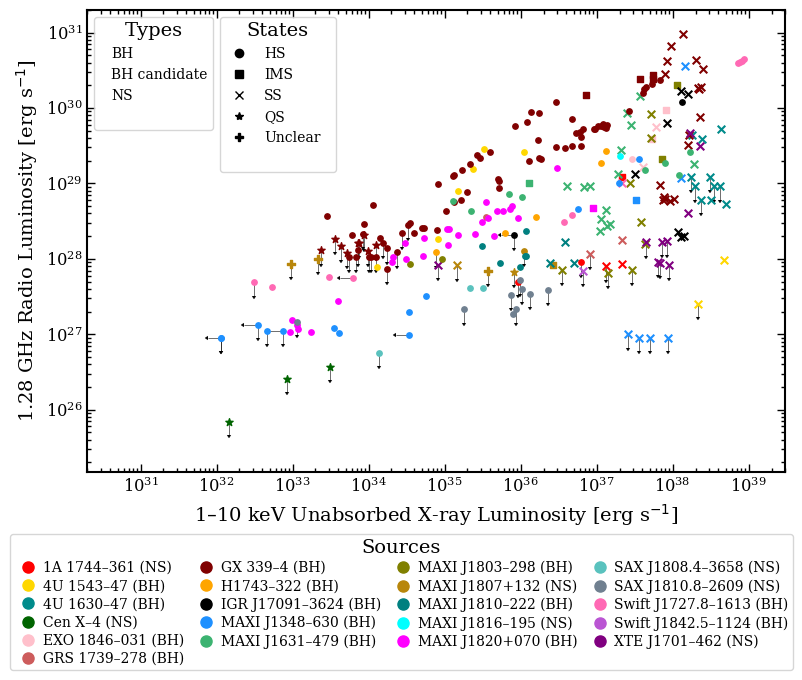

In [9]:
plot_Lr_Lx_plot1(all_data_paired)

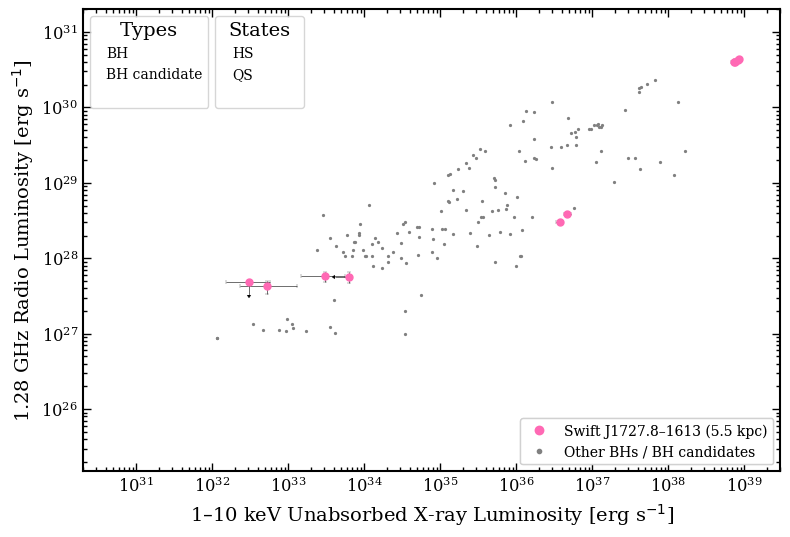

In [10]:
plot_Lr_Lx_plot3(all_data_paired, source_name= "Swift J1727.8-1613")

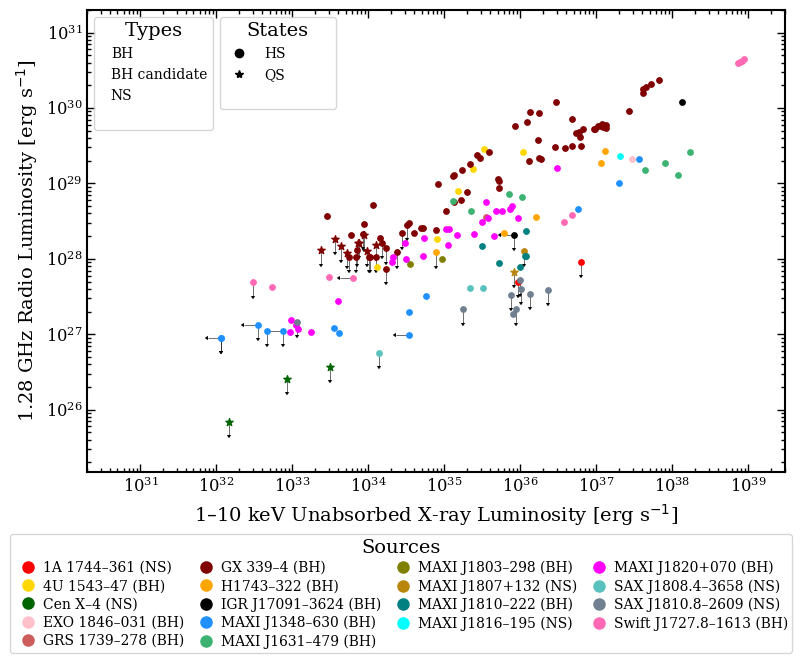

In [11]:
plot_Lr_Lx_plot1(all_data_paired, states=["HS", "QS"])

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


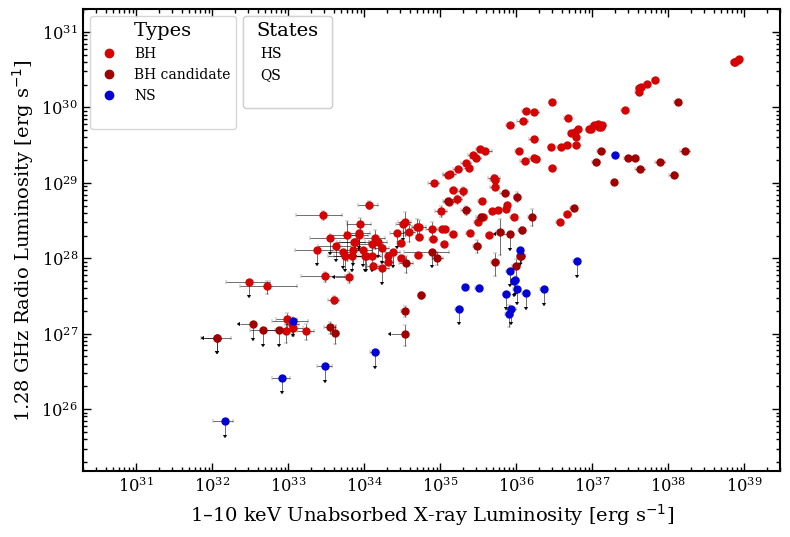

In [12]:
plot_Lr_Lx_plot2(all_data_paired, show_bahramian=False)

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


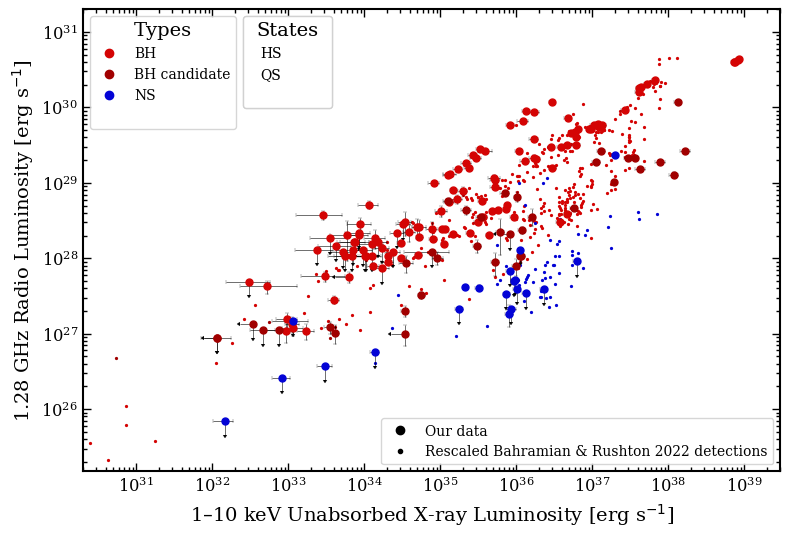

In [13]:
plot_Lr_Lx_plot2(all_data_paired, show_bahramian=True)

# Interpolating

In [14]:
all_data_interp = get_all_LrLx_data(names = None, interp=True, rerun = False, save=True)

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']


In [15]:
## Luminosity range

df = all_data_interp

Lx = df["Lx"].to_numpy()
Lr= df["Lr"].to_numpy()

print(f"Radio luminosity (Lr) range: {np.min(Lr)} - {np.max(Lr)} erg/s")
print(f"X-ray luminosity (Lx) range: {np.min(Lx)} - {np.max(Lx)} erg/s")


## Number of sources 
unique_names = df["name"].unique()
n_names = len(unique_names)
print("Sources: ", unique_names)
print("Number of sources: ", n_names)


## Number of BH and BH candidates
mask = df["class"].isin(["BH", "candidateBH"])
unique_names = df[mask]["name"].unique()
n_names = len(unique_names)
#print("BH and BH candidates: ", unique_names)
print("Number of BH and BH candidates: ", n_names)


## Number of sources actually used on the HS/QS plane
filtered_df = df[df["state"].isin(["HS", "QS"])]
unique_names = filtered_df["name"].unique()
n_names = len(unique_names)
#print("Sources: ", unique_names)
print("Number of sources used for the HS/QS plane: ", n_names)


## Number of BH and BH candidates used on the HS/QS plane
mask = filtered_df["class"].isin(["BH", "candidateBH"])
unique_names = filtered_df[mask]["name"].unique()
n_names = len(unique_names)
print("Number of BH and BH candidates used for the HS/QS plane: ", n_names)


## Number of paired data points
n_data = len(df)
print(f"Number of interpolated LrLx data points: {n_data}")


## Number of paired HS/QS data points
n_data = len(df[df["state"].isin(["HS", "QS"])])
print(f"Number of interpolated HS & QS LrLx data points: {n_data}")


Radio luminosity (Lr) range: 6.910104266617288e+25 - 9.436096840227368e+30 erg/s
X-ray luminosity (Lx) range: 1.2052876331658623e+32 - 8.571969615422546e+38 erg/s
Sources:  ['1A 1744-361' '4U 1543-47' '4U 1630-47' 'Cen X-4' 'EXO 1846-031'
 'GRS 1739-278' 'GX 339-4' 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630'
 'MAXI J1631-479' 'MAXI J1803-298' 'MAXI J1807+132' 'MAXI J1810-222'
 'MAXI J1816-195' 'MAXI J1820+070' 'SAX J1808.4-3658' 'SAX J1810.8-2609'
 'Swift J1727.8-1613' 'Swift J1842.5-1124' 'Vela X-1' 'XTE J1701-462']
Number of sources:  22
Number of BH and BH candidates:  14
Number of sources used for the HS/QS plane:  20
Number of BH and BH candidates used for the HS/QS plane:  14
Number of interpolated LrLx data points: 437
Number of interpolated HS & QS LrLx data points: 275


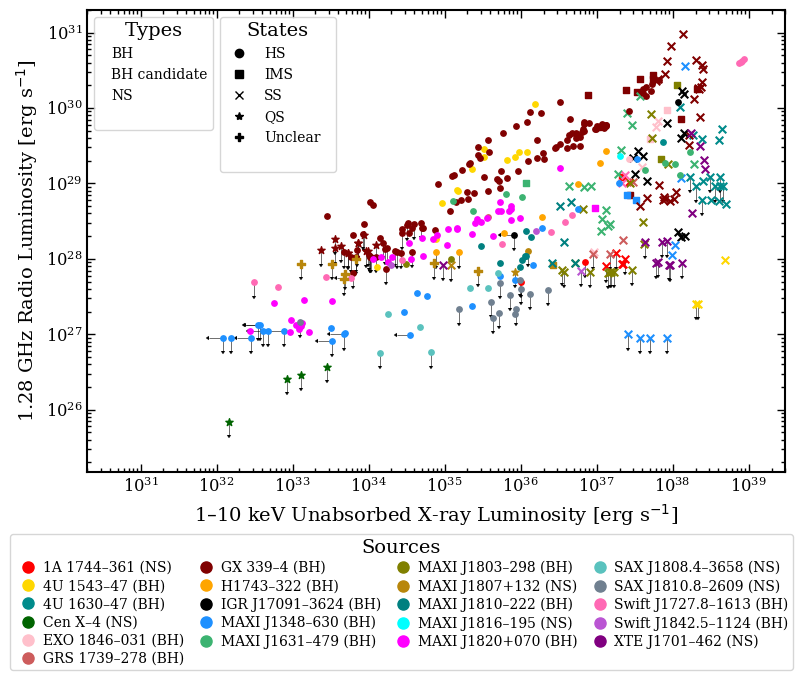

In [16]:
plot_Lr_Lx_plot1(all_data_interp, save_name="LrLx_plane_interp_sources")

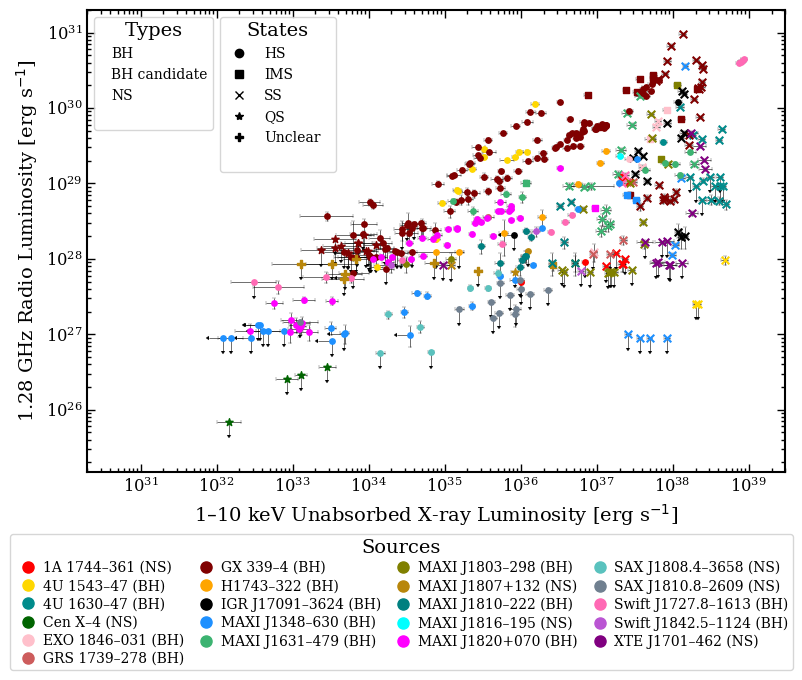

In [17]:
plot_Lr_Lx_plot1(all_data_interp, show_error_bars=True, save_name="LrLx_plane_interp_sources_with_errors")

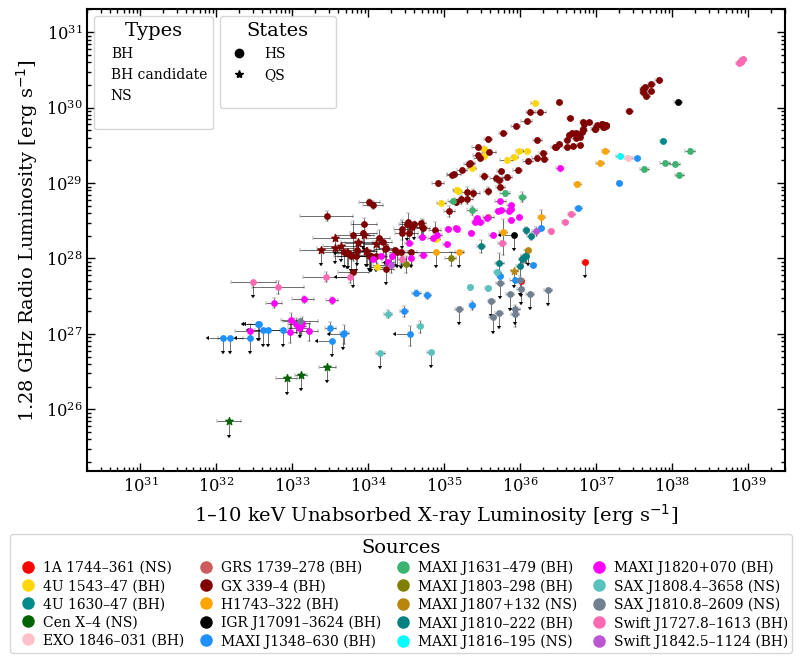

In [18]:
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], show_error_bars=True, save_name="LrLx_plane_interp_sources_with_errors_HS_QS")

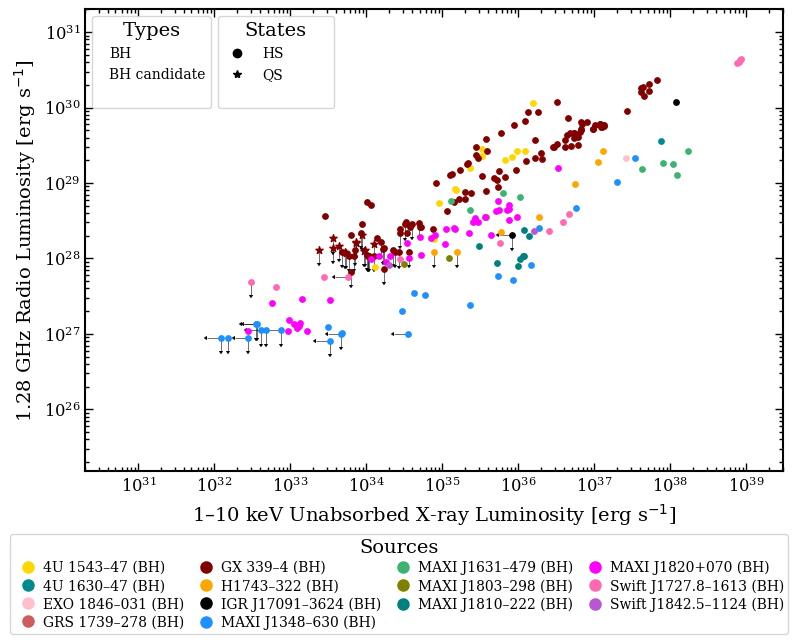

In [19]:
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], types=["BH", "candidateBH"])

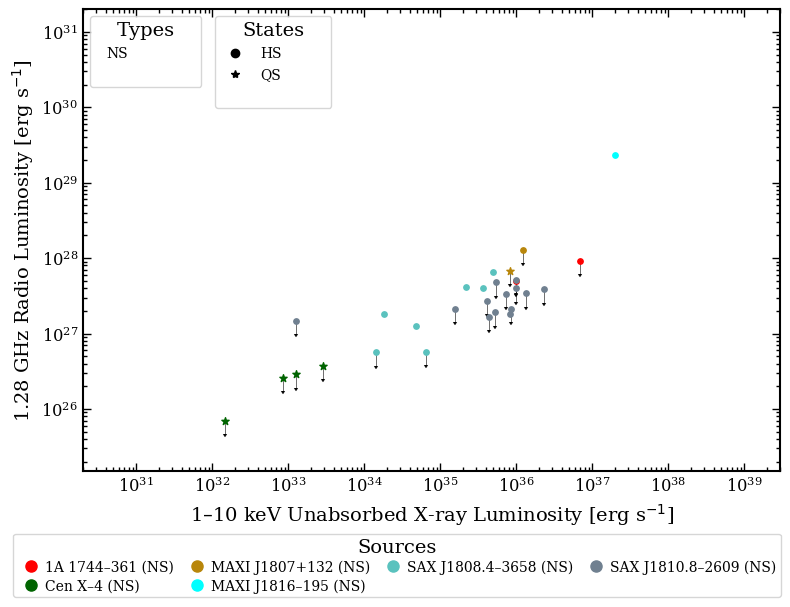

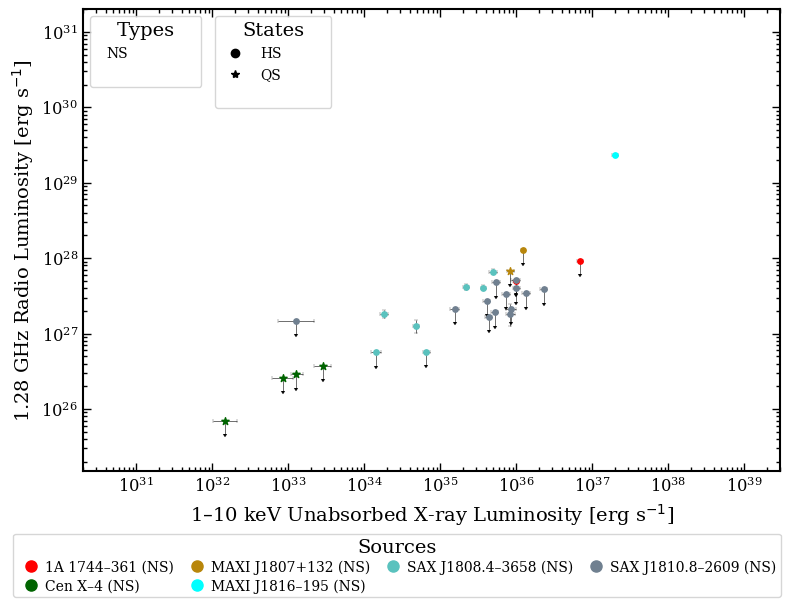

In [20]:
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], types=["NS"])
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], types=["NS"], show_error_bars=True)

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


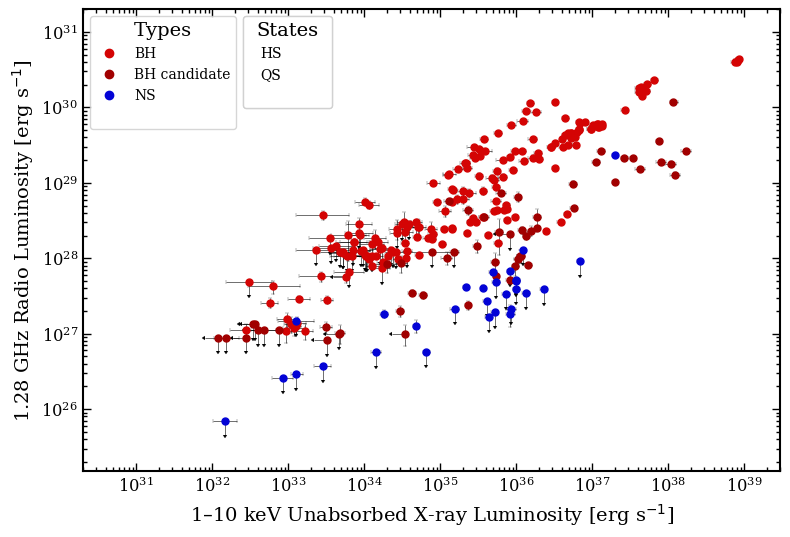

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


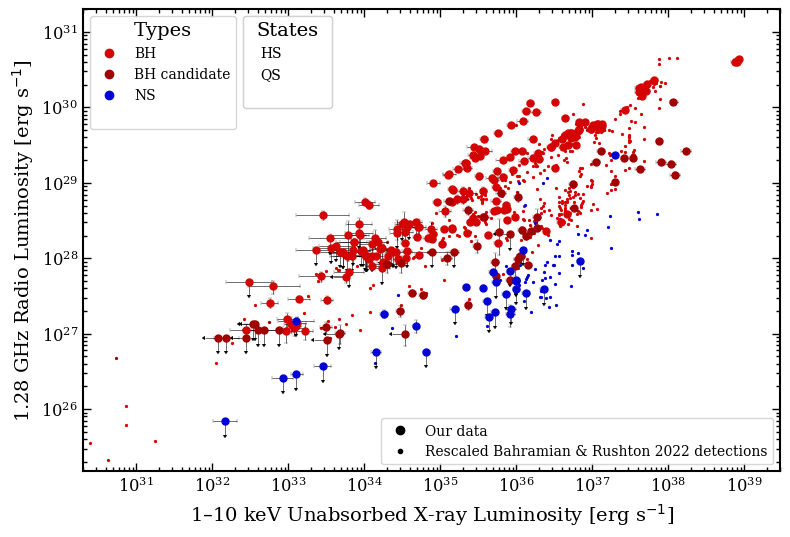

In [21]:
plot_Lr_Lx_plot2(all_data_interp, show_bahramian=False, save_name="LrLx_plane_interp_source_types")
plot_Lr_Lx_plot2(all_data_interp, save_name="LrLx_plane_interp_source_types_with_bah")

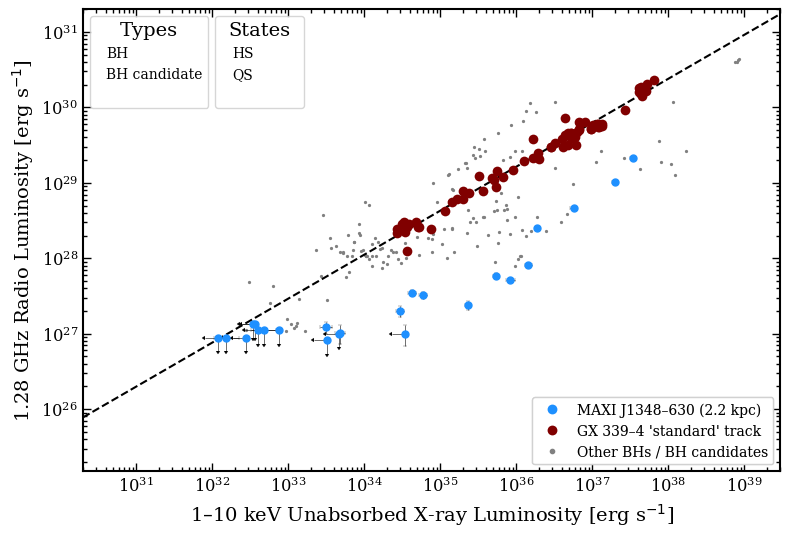

In [22]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "MAXI J1348-630", save_name ="LrLx_plane_interp_maxij1348", show_standard_track=True)

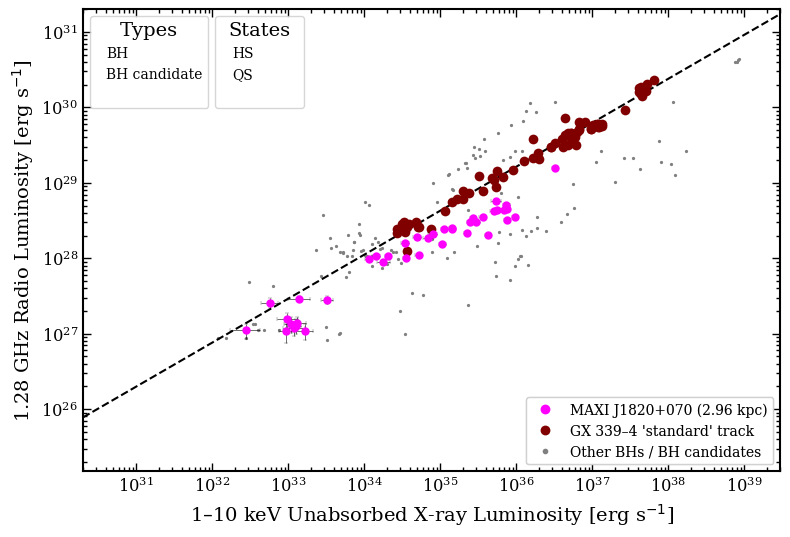

In [23]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "MAXI J1820+070", save_name="LrLx_plane_interp_maxij1820", show_standard_track=True)

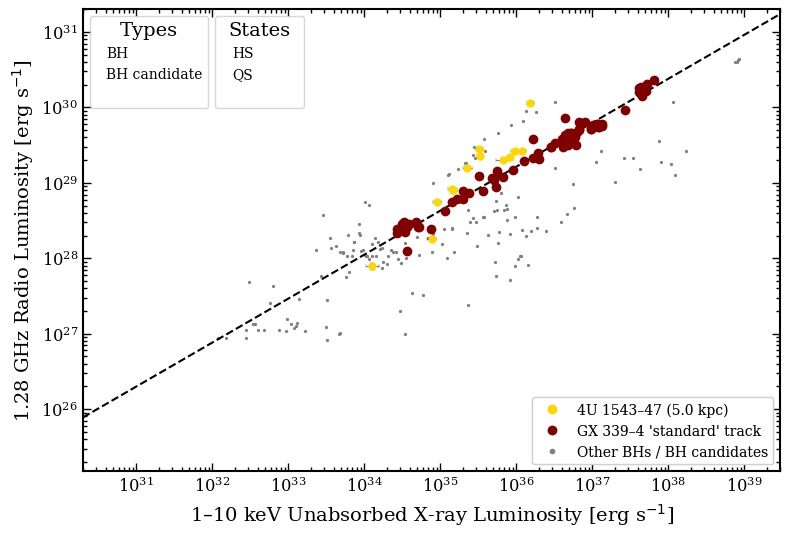

In [24]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "4U 1543-47", save_name="LrLx_plane_interp_4u1543", show_standard_track=True)

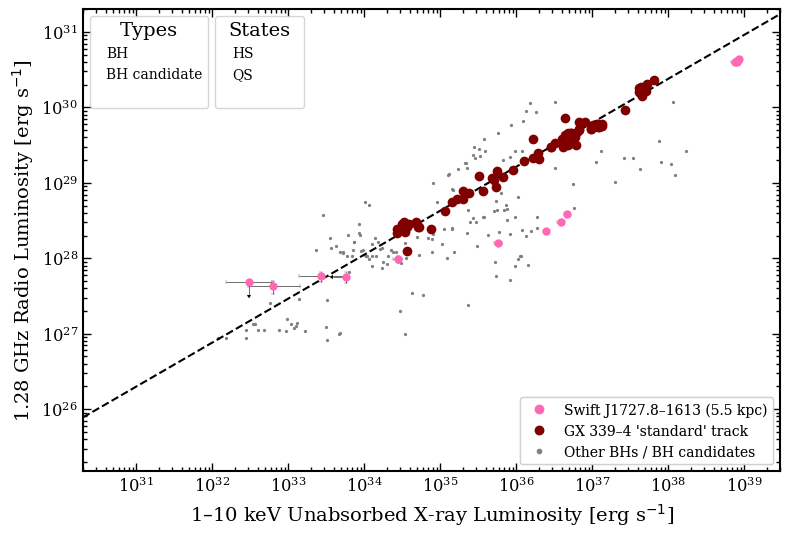

In [25]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "Swift J1727.8-1613", save_name="LrLx_plane_interp_swiftj1727", show_standard_track=True)

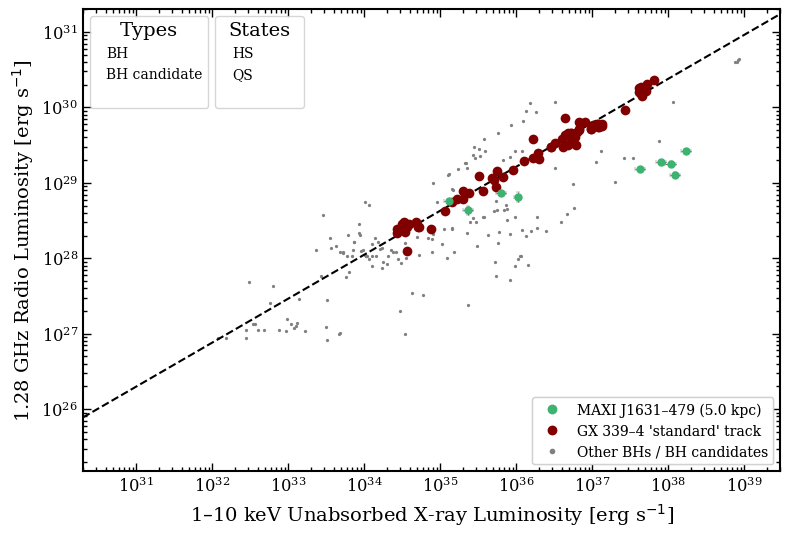

In [26]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "MAXI J1631-479", save_name="LrLx_plane_interp_maxij1631", show_standard_track=True)